<a id='1'></a>

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:80%;text-align:center;border-radius:10px; border: 2px solid #FFA500; padding: 10px;"><b>1|</b> 📚 IMPORTING LIBRARIES 📚</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Word Analysis
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

#Importing Machine learning Models
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

import pickle

ModuleNotFoundError: No module named 'wordcloud'

<a id='2'></a>

# <p style="background-color: #20B2AA; font-family: Arial, sans-serif; color: #FFFFFF; font-size: 80%; text-align: center; border-radius: 10px; padding: 15px; border: 4px solid yellow; border-style: dashed;"><b>2|</b> 🔄 LOADING DATASET 🤖 </p>




In [ ]:
df = pd.read_csv("/kaggle/input/data-science-jobs-and-salary-glassdoor/glassdoor_jobs.csv")

# <div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:60%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 70%; letter-spacing: 1px; margin: 0; width: 750%;"><b> 2) Data Checks to Perform</b></b></p>
</div>
  <ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:57%">
    <li>Check Missing values</li>
    <li>Check Duplicates</li>
    <li>Check data type</li>
    <li>Check the number of unique values of each column</li>
    <li>Check statistics of the dataset</li>
    <li>Check various categories present in the different categorical columns</li>
  </ul>


<a id='data_cleaning'></a>
# <p style="background-color:#FF6347;font-family:Verdana, sans-serif;color:#FFFFFF;font-size:90%;text-align:center;border-radius:10px;padding:10px;"><b>3|</b> 🧹 Data Cleaning 🛁 </p>



In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [ ]:
df.shape

(956, 15)

In [ ]:
pd.set_option('display.max_columns', None)
df.head(10)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"




#### By looking into the scraped data we will do the following tasks.

<div style="color: #1E90FF; display: inline-block; border-radius: 10px; background-color: #F0F8FF; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px groove #1E90FF; width:50%;">
    <p style="padding: 15px; color: #1E90FF; overflow: hidden; font-size: 24px; letter-spacing: 1px; margin: 0; width: 100%;">
        <b> Tasks List:</b>
    </p>
</div>


<div style="border: 2px solid #1E90FF; border-radius: 10px; margin-top: 10px; width:50%">
    <ol style="list-style-type: none; padding: 10px;">
        <li>1. Renaming Columns.</li>
        <li>2. Salary Parsing.</li>
        <li>3. Company Name text only.</li>
        <li>4. State of Field.</li>
        <li>5. Age of Company.</li>
        <li>6. Parsing of job description (python, etc.)</li>
    </ol>
</div>


<div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:60%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 18px; letter-spacing: 1px; margin: 0; width: 750%;"><b>1. Renaming Columns:</b></p>
</div>



In [ ]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

#job title and seniority

# Fix state Los Angeles

# JOb description in length

# Competitor count

# Hourly wage to annual



<div style="color: #4CAF50; display: inline-block; border-radius: 8px; background-color: #E0FFFF; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px outset pink; width:60%">
    <p style="padding: 15px; color: #4CAF50; overflow: hidden; font-size: 18px; letter-spacing: 1px; margin: 0; width: 750px;">
        <b> 2. Salary Parsing:</b>
    </p>
</div>

Removing the -1 in the salary estimate column


In [ ]:
df = df[df['Salary Estimate']!= '-1']
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"


## `Removing the glassdoor est text in the salary column:`

In [ ]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,5,Data Scientist,$71K-$119K,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,6,Data Scientist,$54K-$93K,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,7,Data Scientist,$86K-$142K,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,8,Research Scientist,$38K-$84K,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,9,Data Scientist,$120K-$160K,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"



## `Removing the k and $ sign from the Salary Estimate:`

> Removing the k and $ sign from the salary column so that 
we can predict or do analysis on numbers

In [ ]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K','').replace('$',''))
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,5,Data Scientist,71-119,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,6,Data Scientist,54-93,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,7,Data Scientist,86-142,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,8,Research Scientist,38-84,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,9,Data Scientist,120-160,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"



>The K and $ sign are removed from the column.<br>
Its a range of numbers we have to convert it into a single number so it can be used for analysis and prediction.


## `Removing Per hour & Employee provided salary text in Salary Estimated Column:`

In [ ]:
df['PerHour'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['Employee'] = df['Salary Estimate'].apply(lambda x: 1 if 'employee provided salary:' in x.lower() else 0)

In [ ]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.lower().replace('per hour', ''))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.lower().replace('employer provided salary:', ''))

In [ ]:
pd.set_option('display.max_rows', 10)
df


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0


>Now the per hour text and employee provided salary text is removed from the salary estimated column.<br>
Only the integer value is remained but there still a problem that the integer is in interval and we have to convert into a single integer.
................................................................................................................................................................................................................................................................


## `Splitting the Salary estimated column:`

- The first will be the minimum salary.<br>
- The second will be the Maximumn Salary.


In [ ]:
df['Min_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
df['Max_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))

- <b> Now two columns are created Min and Max salary.</b><br>
To get the single integer in Salary Estimate column we will take average of these two columns

In [ ]:
df['Salary Estimate']= (df['Min_Salary'] + df['Max_Salary'])/2

df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143



- Now the Salary Estimate column is completely clean and ready to use.<br>
NOTE: The datatype of values is float and if for some reason you want to convert in into integer datatype use the following line of code.

```
df['Salary Estimate']= (df['Min_Salary'] + df['Max_Salary'])//2
```

In [ ]:



df.drop(['Min_Salary','Max_Salary'] , axis =1)



,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",84.5,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0
951,951,Senior Data Engineer,102.5,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0
952,952,"Project Scientist - Auton Lab, Robotics Institute",73.5,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0
953,953,Data Science Manager,127.5,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0


<div style="color: #4CAF50; display: inline-block; border-radius: 8px; background-color: #E0FFFF; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px outset pink; width:50%">
    <p style="padding: 15px; color: #4CAF50; overflow: hidden; font-size: 18px; letter-spacing: 1px; margin: 0; width: 750px;">
        <b> 3.Cleaning Company Name Column:</b>
    </p>
</div>

In [ ]:
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143
5,5,Data Scientist,95.0,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119
6,6,Data Scientist,73.5,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,0,54,93
7,7,Data Scientist,114.0,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,0,86,142
8,8,Research Scientist,61.0,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,0,38,84
9,9,Data Scientist,140.0,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,120,160


In [ ]:
df['Company Name'] = df.apply(lambda x: x['Company Name'] if x['Rating']<0 else x['Company Name'][:-1], axis = 1)


In [ ]:
df['Company Name']= df['Company Name'].apply(lambda x: x.split('\n')[0])


<b>Now the Company Name column is cleaned and ready to use for EDA</b>

<div style="color: #4CAF50; display: inline-block; border-radius: 8px; background-color: #E0FFFF; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px outset pink; width:50%">
    <p style="padding: 15px; color: #4CAF50; overflow: hidden; font-size: 18px; letter-spacing: 1px; margin: 0; width: 750px;">
        <b> 4. State of Field Column Cleaning:</b>
    </p>
</div>

We can create the state column from the location column 

In [ ]:
df['State'] = df.Location.apply(lambda x: x.split(',')[1])


In [ ]:
df.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary,State
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,NM
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,MD


In [ ]:
# df= df.drop(['States'], axis = 1)
# df.head()

### `Lets see if the location & Headquarter is same`


In [ ]:
df['Same State'] = df.apply(lambda x: 1 if x.Location==x.Headquarters else 0, axis =1)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary,State,Same State
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,NM,0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,MD,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,FL,1
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,WA,1
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,NY,1


<div style="color: #4CAF50; display: inline-block; border-radius: 8px; background-color: #E0FFFF; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px outset pink; width:50%">
    <p style="padding: 15px; color: #4CAF50; overflow: hidden; font-size: 18px; letter-spacing: 1px; margin: 0; width: 750px;">
        <b> 5. Age of Company:</b>
    </p>
</div>

In [ ]:
df['Age'] = df['Founded'].apply(lambda x: x if x<1 else 2023-x)


In [ ]:
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary,State,Same State,Age
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,NM,0,50
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,MD,0,39
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,FL,1,13
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,WA,1,58
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,NY,1,25
5,5,Data Scientist,95.0,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119,TX,1,23
6,6,Data Scientist,73.5,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,0,54,93,MD,1,15
7,7,Data Scientist,114.0,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,0,86,142,CA,0,18
8,8,Research Scientist,61.0,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,0,38,84,NY,1,9
9,9,Data Scientist,140.0,isn’t your usual company. Our work is powered ...,4.6,<intent>,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,120,160,NY,1,14


<div style="color: #4CAF50; display: inline-block; border-radius: 8px; background-color: #E0FFFF; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px outset pink; width:50%">
    <p style="padding: 15px; color: #4CAF50; overflow: hidden; font-size: 18px; letter-spacing: 1px; margin: 0; width: 750px;">
        <b> 6. Parsing the Job Description (python etc):</b>
    </p>
</div>

<div style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:40%">
    <ul style="list-style-type: none; padding: 10px;">
        <li>python.</li>
        <li>R Studio.</li>
        <li>Spark.</li>
        <li>AWS.</li>
        <li>Excel.</li>
    </ul>
</div>


In [ ]:
# for python
df['Python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)



df['R Studio'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() or 'r_studio' in x.lower() else 0)


# For Spark
df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)


# For AWS
df['AWS_yn'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)


# For Excel
df['Excel_yn'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [ ]:
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary,State,Same State,Age,Python_yn,R Studio,Spark,AWS_yn,Excel_yn
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,NM,0,50,1,0,0,0,1
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,MD,0,39,1,0,0,0,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,FL,1,13,1,0,1,0,1
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,WA,1,58,1,0,0,0,0
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,NY,1,25,1,0,0,0,1
5,5,Data Scientist,95.0,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119,TX,1,23,1,0,0,1,1
6,6,Data Scientist,73.5,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,0,54,93,MD,1,15,0,0,0,0,1
7,7,Data Scientist,114.0,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,0,86,142,CA,0,18,1,0,1,1,1
8,8,Research Scientist,61.0,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,0,38,84,NY,1,9,0,0,0,0,0
9,9,Data Scientist,140.0,isn’t your usual company. Our work is powered ...,4.6,<intent>,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,120,160,NY,1,14,1,0,1,0,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn'],
      dtype='object')

In [ ]:
#df = df.drop(['Unnamed: 0'], axis=1)
# columns = df.columns
list = ['Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn']
# CleanedData= pd.DataFrame()
df=df[list]

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary,State,Same State,Age,Python_yn,R Studio,Spark,AWS_yn,Excel_yn
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,MD,0,39,1,0,0,0,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,FL,1,13,1,0,1,0,1
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,WA,1,58,1,0,0,0,0
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,NY,1,25,1,0,0,0,1


In [ ]:


df['Job_simp'] = df['Job Title'].apply(title_simplifier)

In [ ]:


df.Job_simp.value_counts()

Job_simp
data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64

In [ ]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

seniority
na        520
senior    220
jr          2
Name: count, dtype: int64

In [ ]:
# Fix state los Angeles

df['job_state'] = df.State.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.State.value_counts()

State
CA             151
MA             103
NY              72
VA              41
IL              40
              ... 
ID               2
MN               2
Los Angeles      1
RI               1
SC               1
Name: count, Length: 38, dtype: int64

In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state'],
      dtype='object')

In [ ]:
# job descrition length

df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [ ]:
df.desc_len

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
950    6162
951    6130
952    3078
953    1642
955    3673
Name: desc_len, Length: 742, dtype: int64

## `- Competitor Count:`



In [ ]:
# competitors count
df['Num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [ ]:
df[['Competitors','Num_comp']]

,Competitors,Num_comp
0,-1,0
1,-1,0
2,-1,0
3,"Oak Ridge National Laboratory, National Renewa...",3
4,"Commerce Signals, Cardlytics, Yodlee",3
...,...,...
950,"Pfizer, AstraZeneca, Merck",3
951,"See Tickets, TicketWeb, Vendini",3
952,-1,0
953,-1,0


## `- Hourly Wage to annual`

In [ ]:
# Hourly wage to annual
df['Min_Salary'] = df.apply(lambda x: x.Min_Salary*2 if x.PerHour==1 else x.Min_Salary, axis =1)
# Hourly wage to annual
df['Man_Salary'] = df.apply(lambda x: x.Max_Salary*2 if x.PerHour==1 else x.Max_Salary, axis =1)



In [ ]:
df[df.PerHour ==1][['PerHour','Min_Salary','Max_Salary']]

,PerHour,Min_Salary,Max_Salary
197,1,34,24
209,1,42,34
240,1,36,25
247,1,42,34
257,1,30,25
...,...,...,...
823,1,54,47
854,1,36,25
875,1,48,39
919,1,42,34


In [ ]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary,State,Same State,Age,Python_yn,R Studio,Spark,AWS_yn,Excel_yn,Job_simp,seniority,job_state,desc_len,Num_comp,Man_Salary
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,NM,0,50,1,0,0,0,1,data scientist,na,NM,2536,0,91
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,MD,0,39,1,0,0,0,0,data scientist,na,MD,4783,0,112
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,FL,1,13,1,0,1,0,1,data scientist,na,FL,3461,0,90
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,WA,1,58,1,0,0,0,0,data scientist,na,WA,3883,3,97
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,NY,1,25,1,0,0,0,1,data scientist,na,NY,2728,3,143


> ### Now Everything is ready for EDA.

<a id='EDA'></a>
# <p style="background-color:#FF6347;font-family:Verdana, sans-serif;color:#FFFFFF;font-size:90%;text-align:center;border-radius:10px;padding:10px;"><b>4|</b> 📊 Exploratory Data Analysis 📊 </p>



In [ ]:
df.describe()

,Salary Estimate,Rating,Founded,PerHour,Employee,Min_Salary,Max_Salary,Same State,Age,Python_yn,R Studio,Spark,AWS_yn,Excel_yn,desc_len,Num_comp,Man_Salary
count,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,100.626011,3.618868,1837.154987,0.032345,0.0,74.719677,127.183288,0.557951,49.389488,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908,128.149596
std,38.855948,0.801210,497.183763,0.177034,0.0,30.980593,46.909006,0.496965,53.962906,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239,45.220324
min,13.500000,-1.000000,-1.000000,0.000000,0.0,15.000000,16.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,16.000000
25%,73.500000,3.300000,1939.000000,0.000000,0.0,52.000000,96.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000,96.000000
50%,97.500000,3.700000,1988.000000,0.000000,0.0,69.500000,124.000000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000,124.000000
75%,122.500000,4.000000,2007.000000,0.000000,0.0,91.000000,155.000000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000,155.000000
max,254.000000,5.000000,2019.000000,1.000000,0.0,202.000000,306.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000,306.000000


In [ ]:
 df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary'],
      dtype='object')

<Axes: >

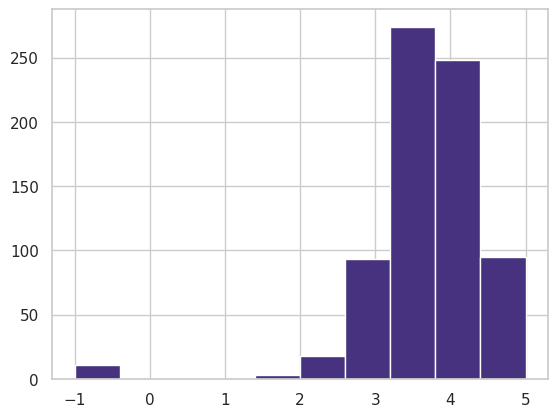

In [ ]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

df.Rating.hist()

<Axes: >

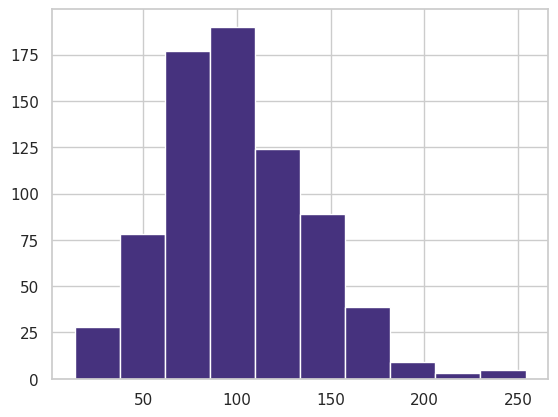

In [ ]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

df['Salary Estimate'].hist()

<Axes: >

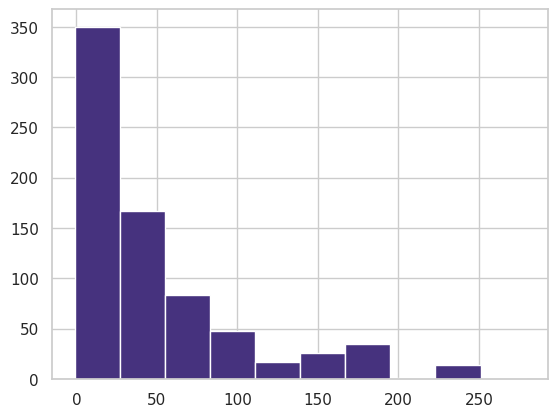

In [ ]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

df.Age.hist()

<Axes: >

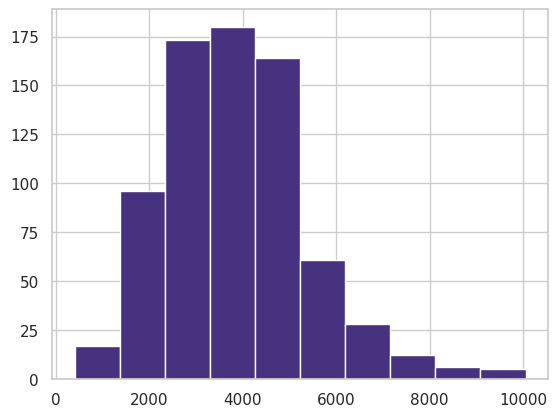

In [ ]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

df.desc_len.hist()

## `Checking Outliers by boxplot`

<b>Columns:</b>

1. Salary Estimate.
2. Age.
3. desc_len.
4. Rating.

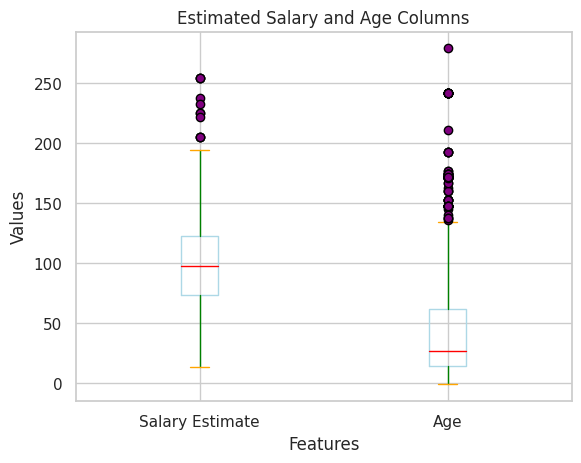

In [ ]:
# Define your custom color palette
custom_palette = ["#1f77b4", "#ff7f0e"]

# Set seaborn style and custom palette
sns.set(style="whitegrid", palette=custom_palette)

# Create the boxplot with custom colors
ax = df.boxplot(column=['Salary Estimate', 'Age'], boxprops=dict(color='lightblue'), 
                medianprops=dict(color='red'), whiskerprops=dict(color='green'),
                capprops=dict(color='orange'), flierprops=dict(markerfacecolor='purple'))

# Set custom colors for the axes
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Estimated Salary and Age Columns')

# Show the plot
plt.show()




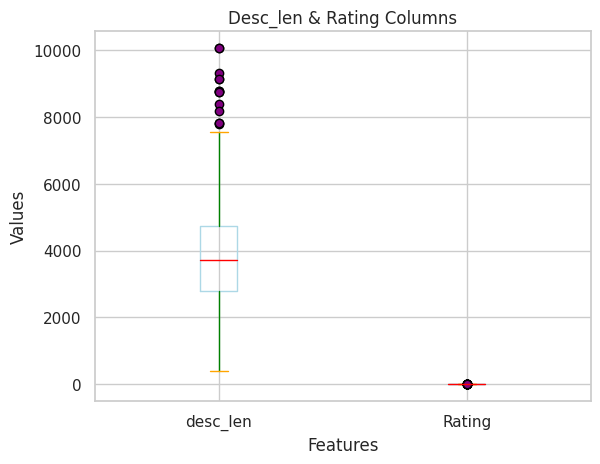

....................................................................................................................


In [ ]:
# Define your custom color palette
custom_palette = ["#1f77b4", "#ff7f0e"]

# Set seaborn style and custom palette
sns.set(style="whitegrid", palette=custom_palette)

# Create the boxplot with custom colors
ax = df.boxplot(column=['desc_len', 'Rating'], boxprops=dict(color='lightblue'), 
                medianprops=dict(color='red'), whiskerprops=dict(color='green'),
                capprops=dict(color='orange'), flierprops=dict(markerfacecolor='purple'))

# Set custom colors for the axes
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Desc_len & Rating Columns')

# Show the plot
plt.show()


print("....................................................................................................................")





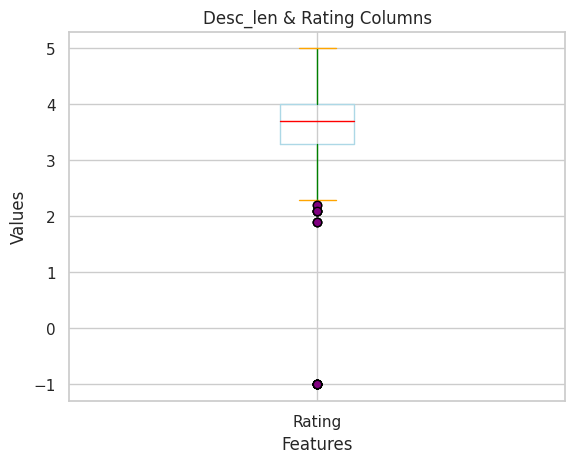

In [ ]:
# Define your custom color palette
custom_palette = ["#1f77b4"]

# Set seaborn style and custom palette
sns.set(style="whitegrid", palette=custom_palette)

# Create the boxplot with custom colors
ax = df.boxplot(column=['Rating'], boxprops=dict(color='lightblue'), 
                medianprops=dict(color='red'), whiskerprops=dict(color='green'),
                capprops=dict(color='orange'), flierprops=dict(markerfacecolor='purple'))

# Set custom colors for the axes
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Desc_len & Rating Columns')

# Show the plot
plt.show()

## `Correlation between Variables`


In [ ]:
df[['Age','Salary Estimate', 'Rating', 'desc_len']].corr()

,Age,Salary Estimate,Rating,desc_len
Age,1.000000,0.019410,0.026164,0.164730
Salary Estimate,0.019410,1.000000,0.013492,0.078808
Rating,0.026164,0.013492,1.000000,-0.012281
desc_len,0.164730,0.078808,-0.012281,1.000000


<Axes: >

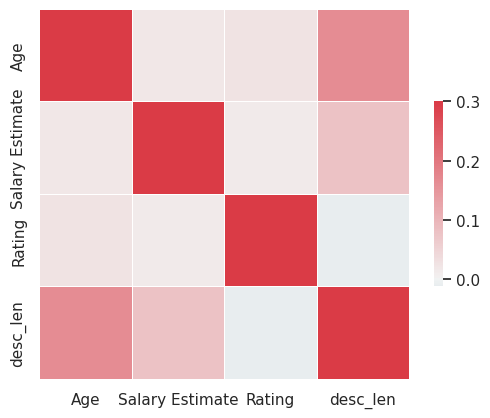

In [ ]:
cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(df[['Age','Salary Estimate', 'Rating', 'desc_len']].corr(), vmax=.3, center=0, cmap=cmap,
           square=True, linewidths=0.5, cbar_kws = {'shrink': .5})

In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary'],
      dtype='object')

In [ ]:
df_cat = df[['Location', 'Headquarters','Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Company Name'
             ,'job_state', 'Same State','Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority']]

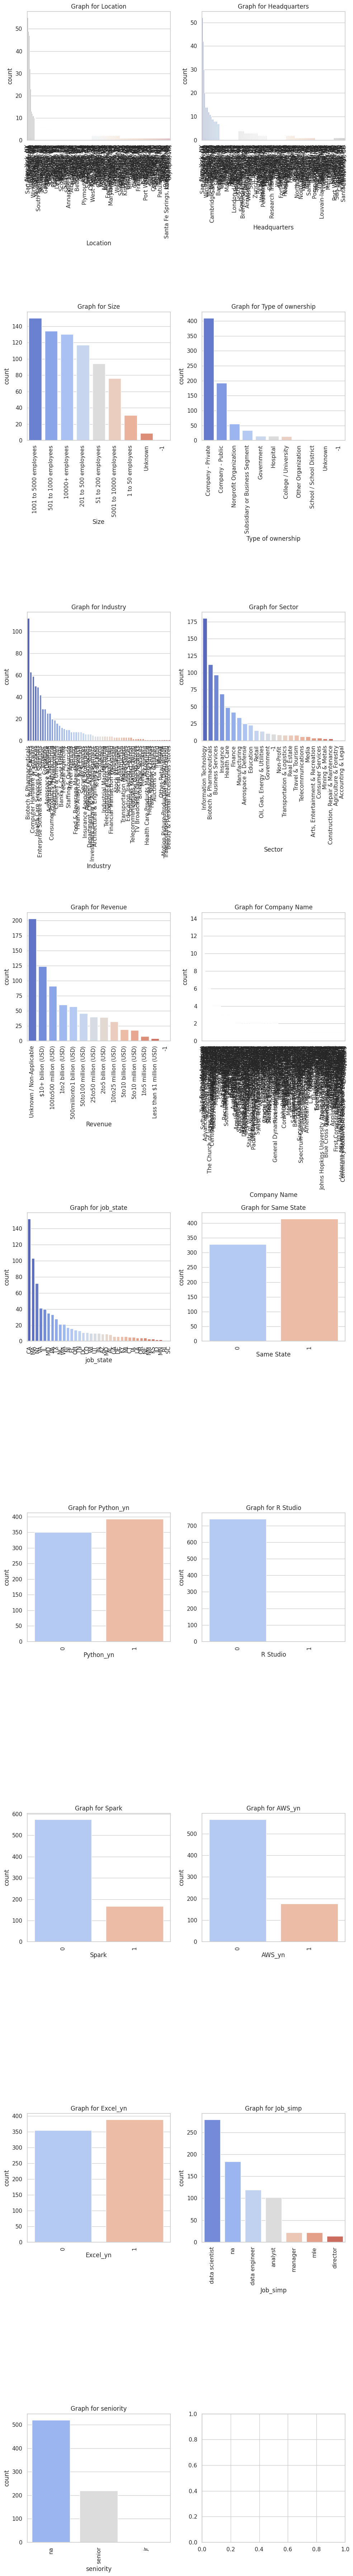

In [ ]:
# Calculate the number of rows needed for subplots
num_rows = len(df_cat.columns) // 2 + len(df_cat.columns) % 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 8*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column in df_cat
for i, col in enumerate(df_cat.columns):
    # Get value counts for the current column
    cat_num = df_cat[col].value_counts()
    
    # Generate a list of colors for each bar
    colors = sns.color_palette("coolwarm", len(cat_num))
    
    # Plot the bar chart with custom colors
    sns.barplot(x=cat_num.index, y=cat_num, palette=colors, ax=axes[i])
    
    # Set title for the subplot
    axes[i].set_title("Graph for %s" % col)
    
    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## `Clearing the Large plot`

Graph for Location: Total = 20
Graph for Headquarters: Total = 20
Graph for Company Name: Total = 20


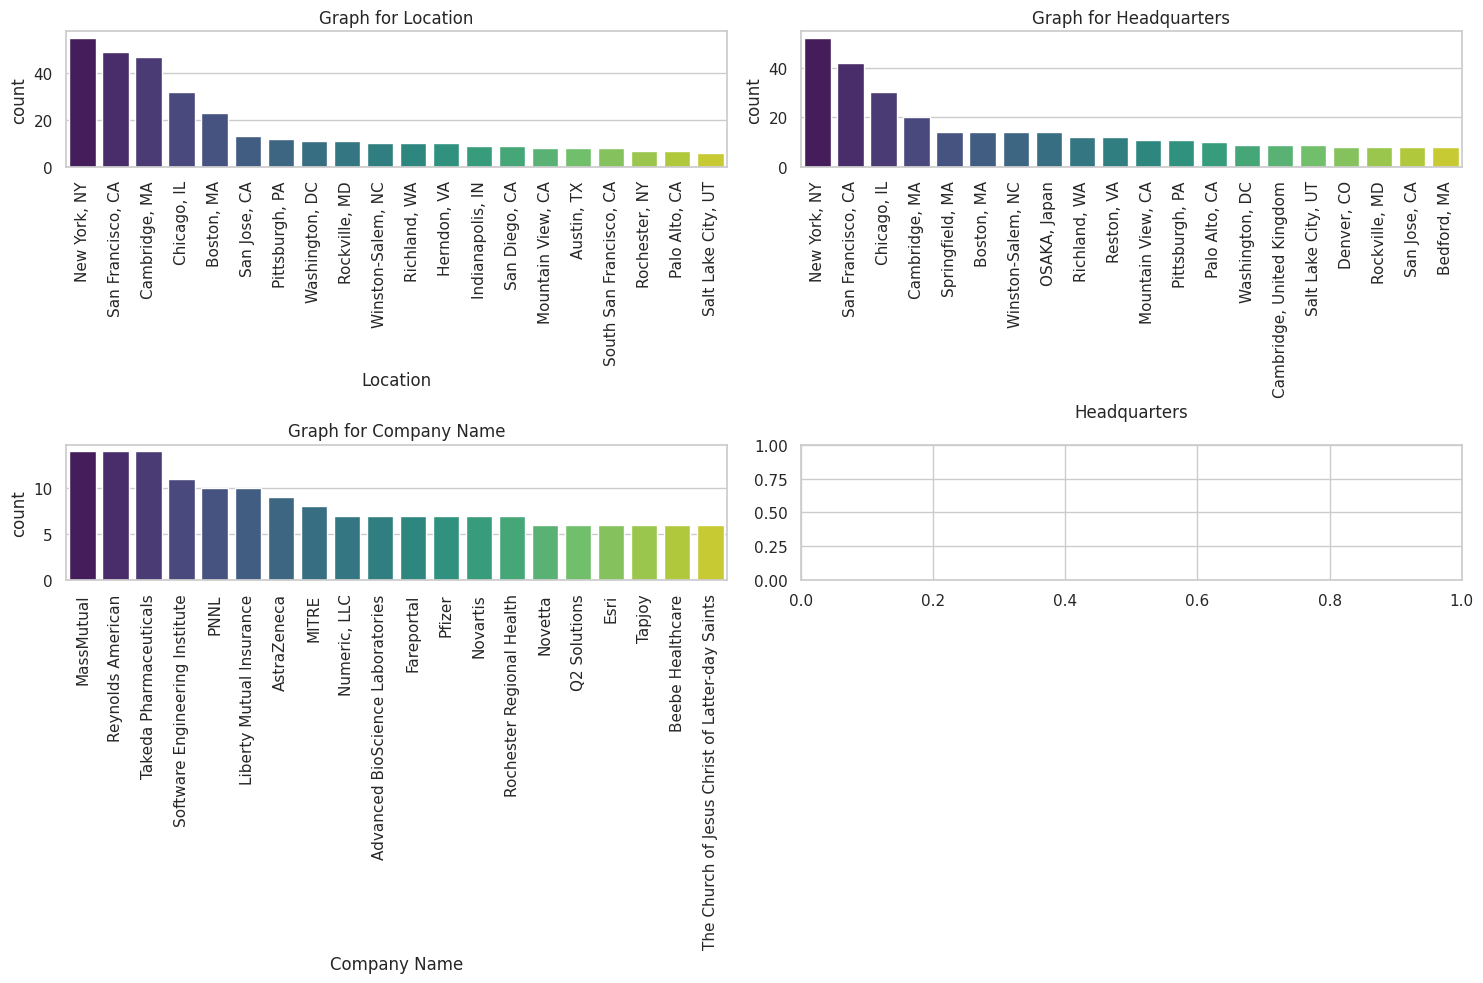

In [ ]:
# Get the columns of interest
columns_of_interest = ['Location', 'Headquarters', 'Company Name']

# Calculate the number of rows needed for subplots
num_plots = len(columns_of_interest)
num_rows = (num_plots + 1) // 2

# Create subplots with appropriate number of rows and columns
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over selected columns in df_cat
for i, col in enumerate(columns_of_interest):
    # Get value counts for the current column
    cat_num = df_cat[col].value_counts()[:20]
    print("Graph for %s: Total = %d" % (col, len(cat_num)))
    
    # Create a bar plot only if there are values to plot
    if not cat_num.empty:
        # Create a bar plot
        chart = sns.barplot(x=cat_num.index, y=cat_num, palette='viridis', ax=axes[i])
        
        # Rotate x-axis labels for better readability
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        
        # Set title for the subplot
        axes[i].set_title("Graph for %s" % col)
    else:
        # Remove the subplot if there are no values to plot
        fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary'],
      dtype='object')

In [ ]:
pd.pivot_table(df, index='Job_simp', values= 'Salary Estimate')

,Salary Estimate
Job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [ ]:
pd.pivot_table(df, index=['Job_simp','seniority'], values= 'Salary Estimate')

Salary Estimate
Job_simp      seniority                 
analyst       jr               56.500000
              na               61.155405
              senior           79.092593
data engineer na               96.701220
              senior          124.689189
...                                  ...
manager       na               84.022727
mle           na              119.133333
              senior          142.071429
na            na               73.988189
              senior          109.061404

[14 rows x 1 columns]

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
pd.pivot_table(df, index=['job_state','Job_simp'], values= 'Salary Estimate', aggfunc='count').sort_values('job_state', ascending=False)

Salary Estimate
job_state Job_simp                       
WI        na                            4
          data scientist                3
          analyst                       3
WA        na                            1
          data scientist               17
          analyst                       3
VA        na                            5
          mle                           2
          data scientist               18
          data engineer                10
          analyst                       6
UT        data engineer                 3
          analyst                       4
          data scientist                3
TX        na                            7
          data scientist               13
          data engineer                 8
TN        data scientist                1
          data engineer                10
          analyst                       2
SC        na                            1
RI        analyst                       1
PA        manager                       3
          data engineer                 1
          data scientist                6
          analyst                       8
          mle                           7
          na                            8
OR        data scientist                3
          data engineer                 1
OH        na                            3
          data scientist                7
          analyst                       4
NY        na                           12
          mle                           2
          data scientist               40
          data engineer                 4
          analyst                      14
NM        data scientist                3
NJ        data scientist                4
          analyst                       6
          data engineer                 2
          manager                       2
          director                      2
          na                            1
NE        na                            4
NC        na                           12
          data scientist                3
          data engineer                 6
MO        na                            3
          manager                       1
          data scientist                3
          analyst                       2
MN        data engineer                 1
          analyst                       1
MI        manager                       2
          data scientist                4
MD        na                           16
          data scientist               13
          data engineer                 3
          analyst                       3
MA        na                           46
          manager                       5
          director                      6
          data scientist               30
          data engineer                12
          analyst                       4
LA        analyst                       1
          data engineer                 2
          na                            1
KY        na                            4
          data scientist                2
KS        mle                           3
IN        na                            4
          data scientist                2
          data engineer                 4
IL        analyst                       3
          na                            6
          mle                           2
          director                      6
          data scientist               15
          data engineer                 8
ID        analyst                       2
IA        analyst                       2
          data engineer                 3
GA        data scientist                3
          na                            3
FL        data scientist                7
          data engineer                 3
          analyst                       6
DE        na                            6
DC        data scientist                5
          data engineer                 4
          analyst                   

In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary'],
      dtype='object')

### `lets only look for the datascience`


In [ ]:
pd.pivot_table(df[df.Job_simp=='data scientist'],index='job_state' ,values= 'Salary Estimate').sort_values('Salary Estimate', ascending=False)



,Salary Estimate
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


## `Salary By Rating`


In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary'],
      dtype='object')

In [ ]:
# Rating, Industry, sector, revenue, number of comp, hourly employer provided, python, r, spark, aws,excel,desc lne, type of ownership 


In [ ]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Employee','Num_comp', 'PerHour', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn', 'Excel_yn', 'desc_len', 'Type of ownership','Salary Estimate' ]]

In [ ]:
# Check data types and convert 'Salary Estimate' column to numeric if necessary
df_pivots['Salary Estimate'] = pd.to_numeric(df_pivots['Salary Estimate'], errors='coerce')

# Drop rows with NaN values in 'Salary Estimate' column
df_pivots.dropna(subset=['Salary Estimate'], inplace=True)

# Create pivot table for each column
for i in df_pivots.columns:
    if i != 'Salary Estimate':  # Exclude 'Salary Estimate' column from pivot table creation
        print(i)
        pivot_table = pd.pivot_table(df_pivots, index=i, values='Salary Estimate', aggfunc='mean')
        pivot_table_sorted = pivot_table.sort_values('Salary Estimate', ascending=False)
        print(pivot_table_sorted.head(2))  # Print only the top 2 rows


Rating
        Salary Estimate
Rating                 
-1.0         136.181818
 5.0         134.700000
Industry
                                          Salary Estimate
Industry                                                 
Other Retail Stores                                 163.5
Motion Picture Production & Distribution            146.0
Sector
        Salary Estimate
Sector                 
Media        116.666667
-1           114.650000
Revenue
                         Salary Estimate
Revenue                                 
$5 to $10 million (USD)       126.111111
$1 to $5 million (USD)        119.312500
Employee
          Salary Estimate
Employee                 
0              100.626011
Num_comp
          Salary Estimate
Num_comp                 
2              106.865854
1              106.208333
PerHour
         Salary Estimate
PerHour                 
0               103.1539
1                25.0000
Python_yn
           Salary Estimate
Python_yn                 
1        

# **`Words Analysis in Description by Word Cloud Plot`**

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


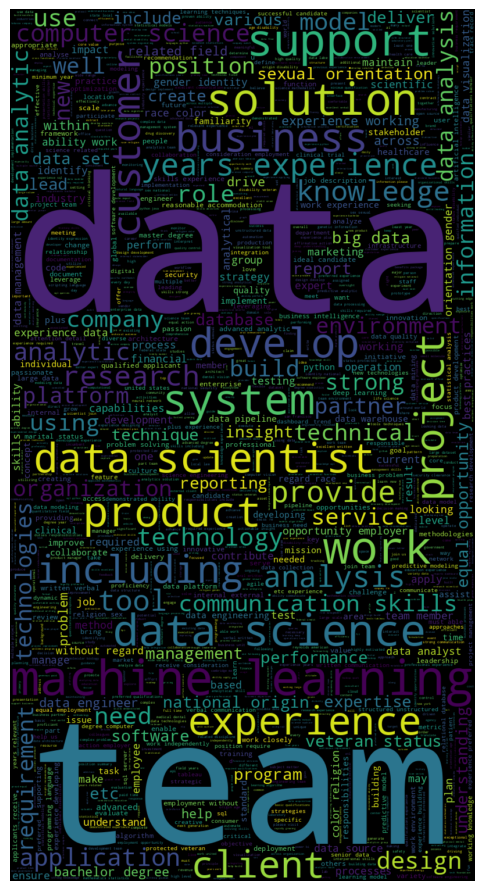

In [ ]:
nltk.download('punkt')


words= " ".join(df['Job Description'])

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text= " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color='black', random_state=1, stopwords=STOPWORDS, max_words=2000,width=800, height=1500)
wc.generate(text)

plt.figure(figsize=(6,25))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

<a id='ModelBuilding'></a>
# <p style="background-color:#4CAF50;font-family:Arial, sans-serif;color:#FFFFFF;font-size:90%;text-align:center;border-radius:5px;padding:10px;"><b>5|</b> 🏗️ Model Building For Salary Prediction 🏗️ </p>



<div style="color: #1E90FF; display: inline-block; border-radius: 10px; background-color: #F0F8FF; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px groove #1E90FF; width:70%;">
    <p style="padding: 15px; color: #1E90FF; overflow: hidden; font-size: 24px; letter-spacing: 1px; margin: 0; width: 100%;">
        <b> Steps to be Followed while building Model:</b>
    </p>
</div>


<div style="border: 2px solid #1E90FF; border-radius: 10px; margin-top: 10px; width:70%">
    <ol style="list-style-type: none; padding: 10px;">
        <li>1. Choose Relevant Columns.</li>
        <li>2. Get Dummy Dates.</li>
        <li>3. Train Test Split.</li>
        <li>4. Multiple Linear Regression.</li>
        <li>5. Lasso Regression.</li>
        <li>6. Random Forest.</li>
        <li>7. Tune Models GridSearchCV.</li>
        <li>8. Test Ensembles.</li>
    </ol>
</div>

<div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500; width:50%">
    <p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 20px; letter-spacing: 1px; margin: 0; width: auto;">
        <b>1.. Choosing Relevant Columns:</b>
    </p>
</div>


In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary'],
      dtype='object')

In [ ]:
df_model = df[['Salary Estimate', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Num_comp', 'PerHour','Job Title', 'job_state','Same State','Age','Python_yn', 'Spark', 'AWS_yn', 'Excel_yn', 'Job_simp', 'seniority', 'desc_len']]
df_model.head()

,Salary Estimate,Rating,Size,Type of ownership,Industry,Sector,Revenue,Num_comp,PerHour,Job Title,job_state,Same State,Age,Python_yn,Spark,AWS_yn,Excel_yn,Job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,Data Scientist,NM,0,50,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,Healthcare Data Scientist,MD,0,39,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,Data Scientist,FL,1,13,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,Data Scientist,WA,1,58,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,Data Scientist,NY,1,25,1,0,0,1,data scientist,na,2728


<div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500; width:50%">
    <p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 20px; letter-spacing: 1px; margin: 0; width: 100%;">
        <b>2. Get Dummy Dates</b>
    </p>
</div>

In [ ]:

df_dum  = pd.get_dummies(df_model)
pd.set_option('display.max_rows',None)

df_dum.head()

,Salary Estimate,Rating,Num_comp,PerHour,Same State,Age,Python_yn,Spark,AWS_yn,Excel_yn,desc_len,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Job Title_Ag Data Scientist,Job Title_Analytics - Business Assurance Data Analyst,Job Title_Analytics Consultant,Job Title_Analytics Manager,Job Title_Analytics Manager - Data Mart,"Job Title_Assistant Director/Director, Office of Data Science",Job Title_Associate Data Analyst,Job Title_Associate Data Analyst- Graduate Development Program,Job Title_Associate Data Engineer,Job Title_Assoc

In [ ]:
df1 = pd.DataFrame(df)

In [ ]:
# Function to map values to 1, 0, or keep them unchanged
df_int = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Display the resulting DataFrame
pd.set_option('display.max_rows',None)
df_int.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary,State,Same State,Age,Python_yn,R Studio,Spark,AWS_yn,Excel_yn,Job_simp,seniority,job_state,desc_len,Num_comp,Man_Salary
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,NM,0,50,1,0,0,0,1,data scientist,na,NM,2536,0,91
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,MD,0,39,1,0,0,0,0,data scientist,na,MD,4783,0,112
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,FL,1,13,1,0,1,0,1,data scientist,na,FL,3461,0,90
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,WA,1,58,1,0,0,0,0,data scientist,na,WA,3883,3,97
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,NY,1,25,1,0,0,0,1,data scientist,na,NY,2728,3,143


<div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500; width:50%">
    <p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 20px; letter-spacing: 1px; margin: 0; width: 100%;">
        <b>3. Train Test Split</b>
    </p>
</div>



In [ ]:
X= df_dum.drop('Salary Estimate', axis=1)
y= df_dum['Salary Estimate'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


<div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500; width:50%">
    <p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 20px; letter-spacing: 1px; margin: 0; width: 100%;">
        <b>4. Multiple Linear Regression</b>
    </p>
</div>



In [ ]:
# !pip install statsmodels

In [ ]:
# import statsmodels.api as sm

# # Assuming X is your independent variable array or DataFrame
# # Assuming y is your dependent variable array or DataFrame

# # Adding a constant term to independent variables
# X_sm = sm.add_constant(X)

# # Fit regression model
# model = sm.OLS(y, X_sm)
# results = model.fit()

# # Inspect the results
# print(results.summary())


In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error')

array([-9.62789539e+08, -1.80208639e+09, -8.83984447e+07, -1.24542211e+09,
       -1.18073509e+09])

In [ ]:
cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error', cv=3)


array([-5.12689971e+08, -1.80883542e+09, -1.00924528e+09])

In [ ]:
# the above output is to skewed so by taking its mean we will be to read
np.mean(cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error', cv=2))

-30.455925794168177

<div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500; width:50%">
    <p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 20px; letter-spacing: 1px; margin: 0; width: 100%;">
        <b>5. Lasso Regression</b>
    </p>
</div>

In [ ]:

lm_l = Lasso()
np.mean(cross_val_score(lm_l, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-21.096199872181035

<b> It means that the lasso Regression model or Algorithm is best from LinearRegresion according to our data</b>


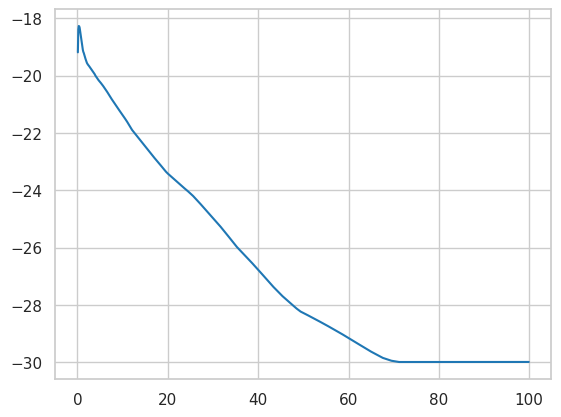

In [ ]:
alpha = []
error = []

for i in range(1,1000):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train, y_train, scoring='neg_mean_absolute_error', cv=2)))

plt.plot(alpha,error)

## `Checking how much we improve our model`

In [ ]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns= ['Alpha', 'error'])

# checking how much we improve the model 
df_err[df_err.error==max(df_err.error)]


,Alpha,error
2,0.3,-18.272763


Now training the lasso model again on the alpha value equal to 0.3

In [ ]:
lm_l = Lasso(alpha=0.3)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))


-19.601360011625143

### `In Lasso Regression the error we record is:`

In [ ]:
np.mean(cross_val_score(lm_l, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-19.601360011625143

<br>

- <b>we can see that improve our from -21.09619987218103 to -18.272763 and that pretty awesome</b>

<div style="color: #1E90FF; display: inline-block; border-radius: 10px; background-color: #F0F8FF; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px groove #1E90FF; width:50%;">
    <p style="padding: 15px; color: #1E90FF; overflow: hidden; font-size: 24px; letter-spacing: 1px; margin: 0; width: 100%;">
        <b> 6. Random Forest Model or Algorithm</b>
    </p>
</div>

<div style="border: 2px solid #1E90FF; border-radius: 10px; margin-top: 10px; width:50%">
    <ol style="list-style-type: none; padding: 10px;">
        <li></li>
        <li>- Calculating its error.</li>
        <li>- Trying to minimize the error.</li>
    </ol>
</div>

#### `Training the Model`

In [ ]:

rf = RandomForestRegressor()

#### `Calculating the error of Random Forest Model`


In [ ]:
np.mean(cross_val_score(rf, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))


-15.051414696884239

Its quit awesome that Random Forest Model is doing for on our data.

without Minimizing the error it performing better than the last algorithms that we apply on our data.

<a id='Tuning'></a>
# <p style="background-color:#4CAF50;font-family:Arial, sans-serif;color:#FFFFFF;font-size:90%;text-align:center;border-radius:5px;padding:10px;"><b>6|</b> 🏗️ Tunning by GridsearchCV 🏗️ </p>



<div style="border: 2px solid #1E90FF; border-radius: 10px; margin-top: 10px; width:50%">
<h3 style= "color:Yellow";>Lets understand how it works:</h3>
    <ol style="list-style-type: none; padding: 10px;">
        <li>- we will give the parameters that we want in model.</li>
        <li>- Based on those parameters it will analyse algorithm.</li>
        <li>- We will select which one is best according to these analysis of GridSearchCV.</li>
    </ol>
</div>






In [ ]:
parameters = {
    'n_estimators': range(10, 300, 10),
    'criterion': ('friedman_mse', 'absolute_error'),
    'max_features': (None, 'sqrt', 'log2')
}

gs = GridSearchCV(rf, parameters, error_score='raise', cv=3)
gs.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
gs.best_score_


In [ ]:
gs.best_estimator_


<h3 style="color:yellow;"> Summary of GridSearchCV:</h3>

Looks like we achieve much better or we minimize the error from `-15.12471850484541` to `0.6424335492673592` amazing right.<br>


we can achieve the accuracy of our model very high if we use the following parameters according to GridSearchCV method:

<p style ="color:RED;font-size:30px"><b>Parameters:</b></p>
1. criterion should be `absolute_error`.
2. max_features should be `None`.
3. n_estimators should be `40`.

<a id='ensembles'></a>
# <p style="background-color:#4CAF50;font-family:Arial, sans-serif;color:#FFFFFF;font-size:90%;text-align:center;border-radius:5px;padding:10px;"><b>7|</b> 🏗️ Model Training or Test Ensembles: 🏗️ </p>


Now we can train our because we know by now everything that are needed for our model to perform outstanding...

In [ ]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)


In [ ]:
mean_absolute_error(y_test,tpred_lml)


In [ ]:
mean_absolute_error(y_test,tpred_rf)

### `Always two of them which are best`


In [ ]:
mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2)


This value should in between the value of tpred_lml and tpred_rf and it is in between so it correct and our model is not over tranied.<br>

LinearRegression is suitable for our data which can be seen cause it has high value.

<a id='production'></a>
# <p style="background-color:#4CAF50;font-family:Arial, sans-serif;color:#FFFFFF;font-size:90%;text-align:center;border-radius:5px;padding:10px;"><b>8|</b> 🏗️ Putting the Model Into Production: 🏗️ </p>

Using pickle to store the neccessory values or variables into a file of pickle so that it can be used in the flask app....

In [ ]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump(pickl,open('model_file'+ '.p', "wb"))




In [ ]:
file_name = "model_file.p"

with open (file_name, "rb") as pickled:
    data = pickle.load(pickled)
    model= data["model"]
    
model.predict(X_test.iloc[1,:].values.reshape(1,-1))



The Above value is the prediction.
#####  `Everything is good now its time to built the flask app for it but for now in this notebook everthing is finished.....`

<a id="9"></a>

<div style="background-color: #e8f8f5; border: 4px solid #4cbb17; border-radius: 10px; padding: 20px; color: #4cbb17; text-align: center; font-family: Arial, sans-serif; font-size: 25px;">
Thank for reading my analysis. ✌️✌️✌️

<div style="background-color: #fff9e6; border: 4px dashed #ffc014; border-radius: 10px; padding: 20px; color: #ffc014; text-align: center; font-family: Arial, sans-serif; font-size: 25px;">If you any questions or advice please write in the comment . ❤️❤️</div>
    </div>